# BOSTON HOUSING DATA

# preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics 
main_dataframe = pd.read_csv("housing.data",header=None)

In [ ]:
main_dataframe.columns = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
main_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Understanding the data

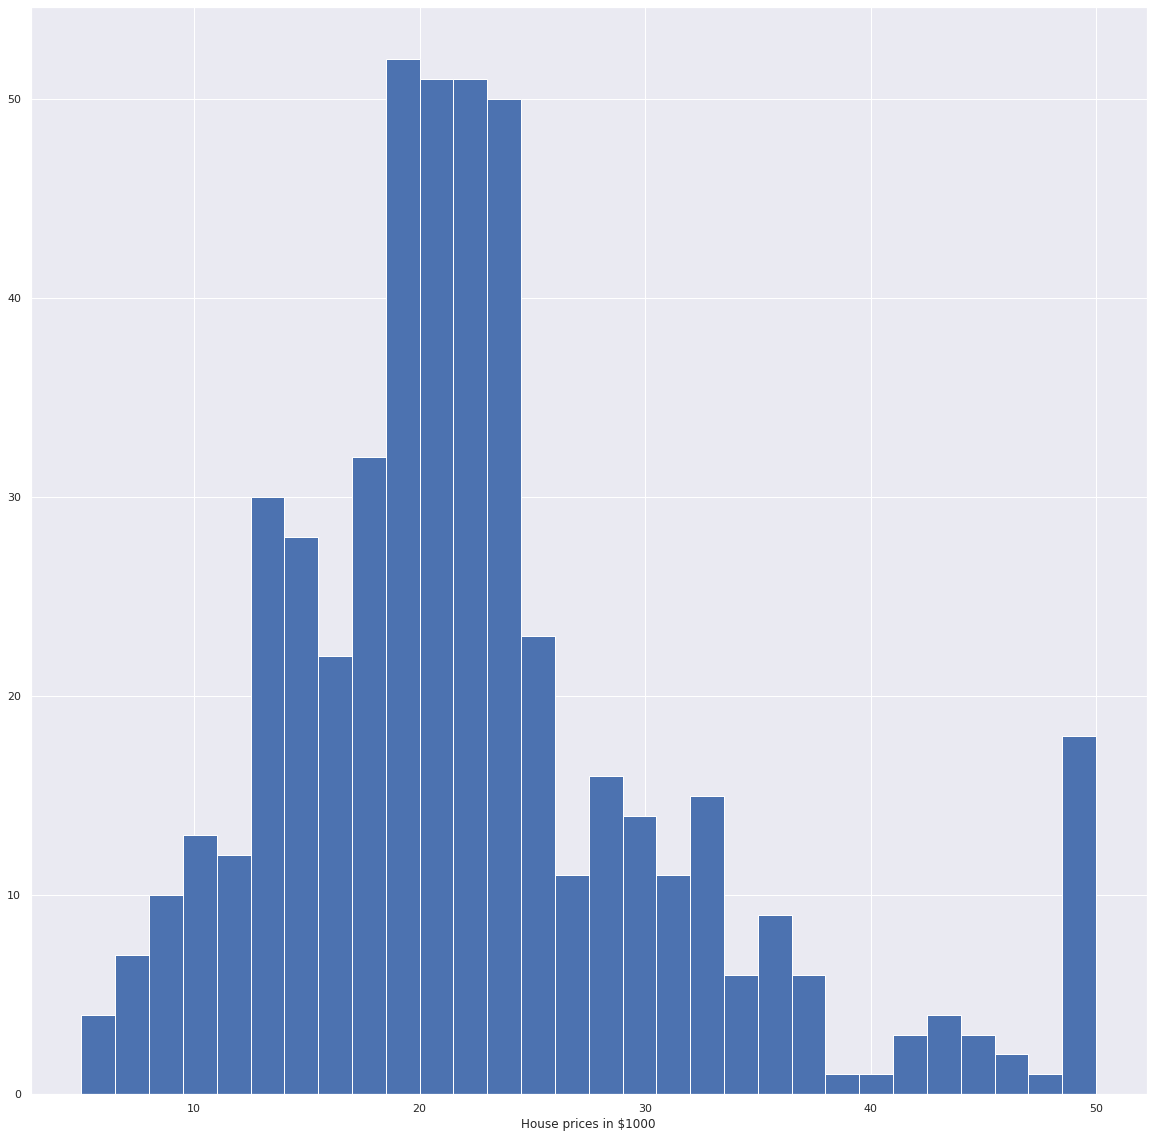

In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
plt.hist(main_dataframe['medv'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()


### we can observe that the house prices are distributed in a way similar to a normal distribution

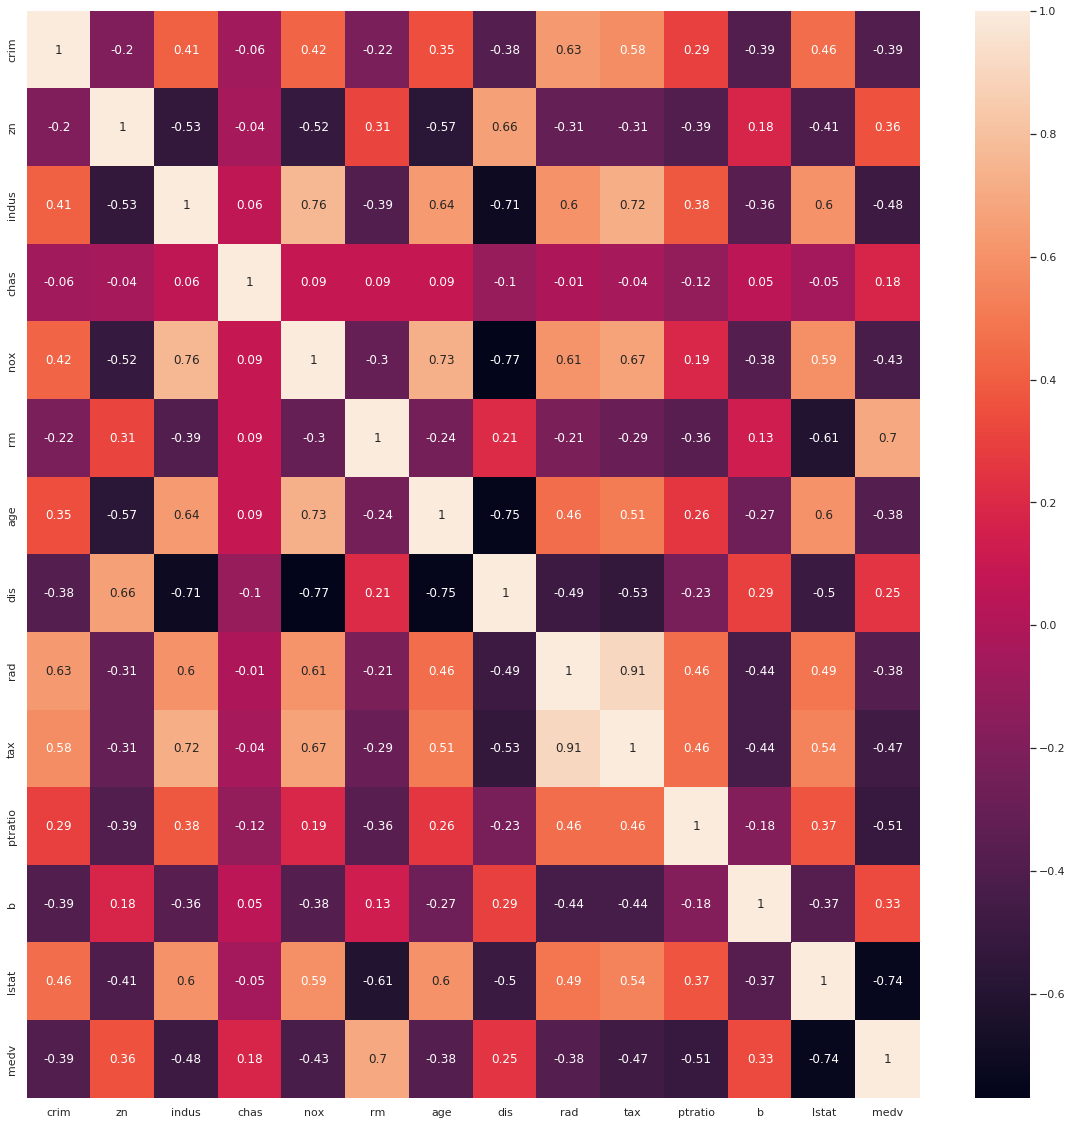

In [ ]:
correlation_matrix = main_dataframe.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)


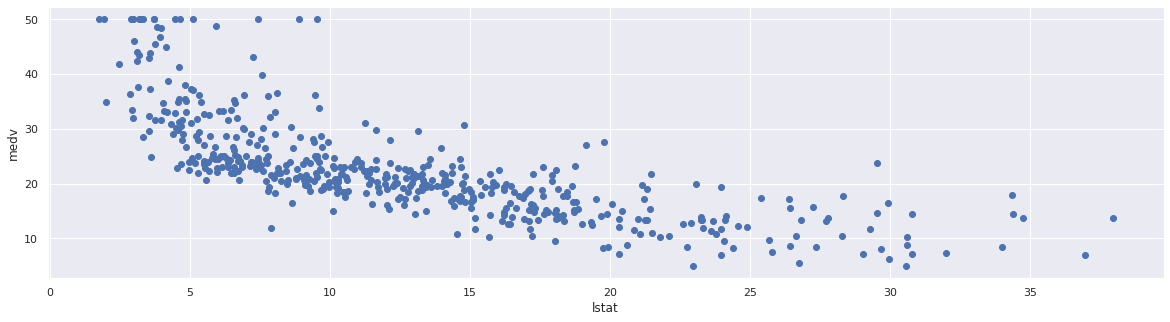

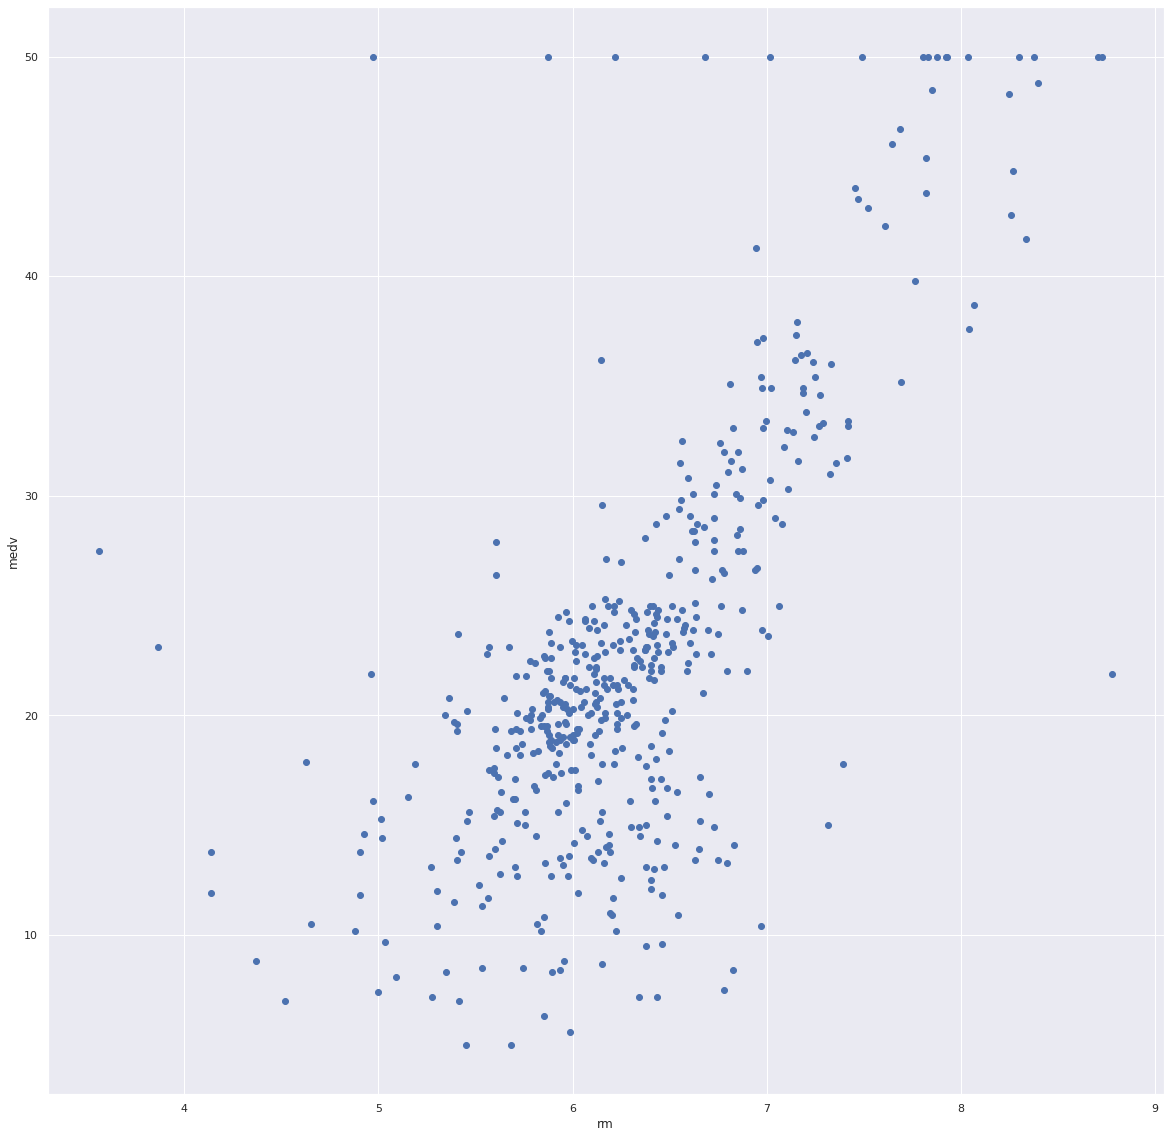

In [ ]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = main_dataframe['medv']
x=main_dataframe["lstat"]
y=main_dataframe["medv"]
plt.scatter(x,y,marker="o")
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()
x=main_dataframe["rm"]
y=main_dataframe["medv"]
plt.scatter(x,y,marker="o")
plt.xlabel("rm")
plt.ylabel("medv")
plt.show()

# Univariate Linear Regression

In [ ]:
#splitting data for training and testing, 80% for learning(400) and 20% for testing(last 106)

learning_rm = main_dataframe.loc[0:400,"rm"]
learning_medv = main_dataframe.loc[0:400,"medv"]
learning_data_frame = learning_rm.to_frame().join(learning_medv) 
testing_rm = main_dataframe.loc[401:505,"rm"]
testing_medv = main_dataframe.loc[401:505,"medv"]



9.430544955111884 -35.45813178943263


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


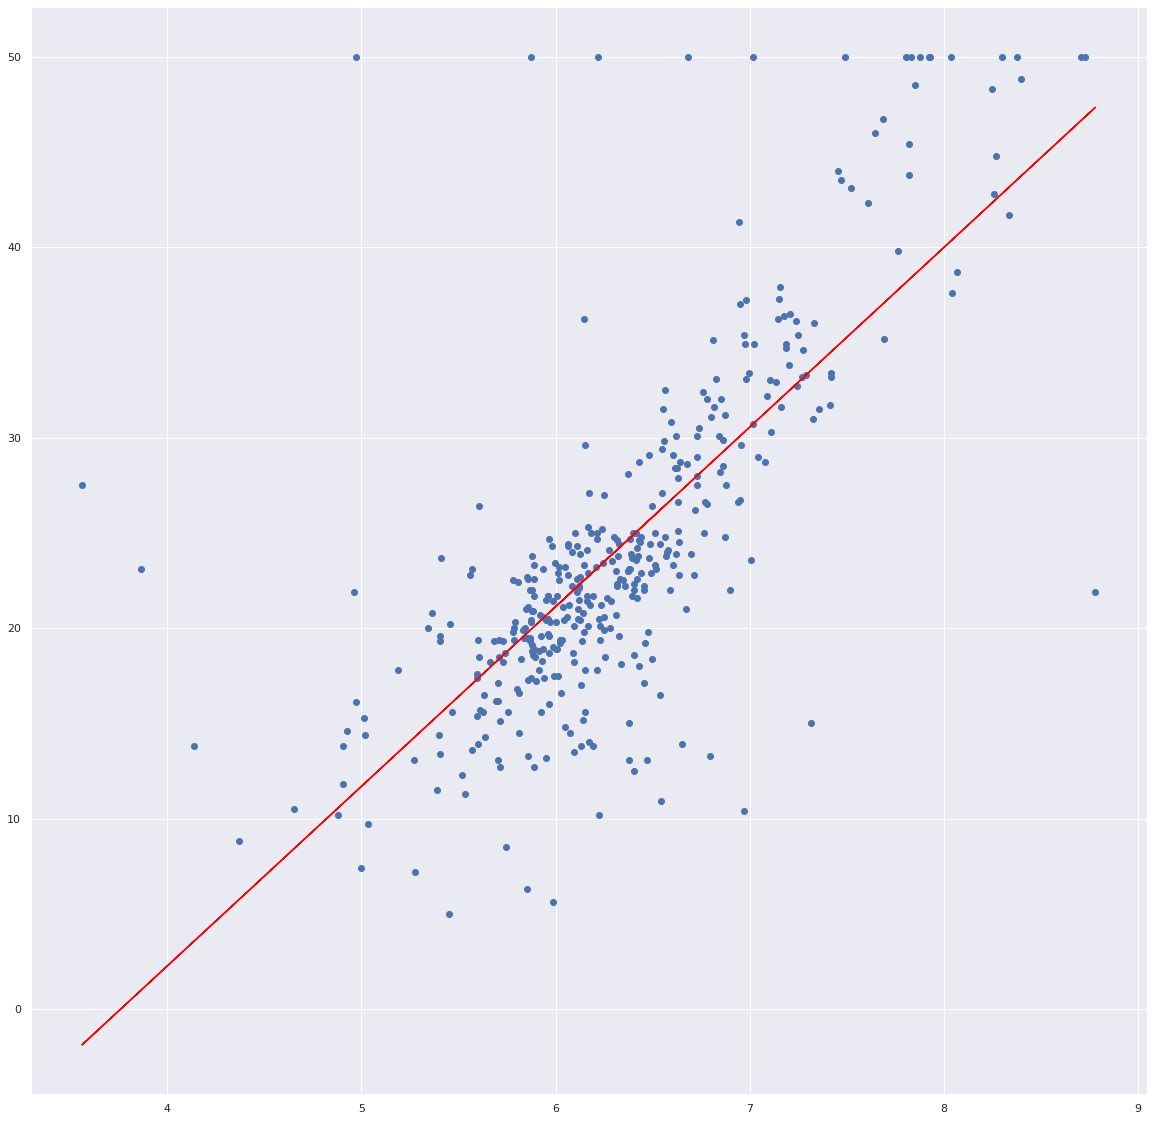

In [ ]:
#doing linear regression on rm and medv
rm = learning_data_frame["rm"]
medv= learning_data_frame["medv"]
list(rm)
list(medv)
rm_1 = np.zeros((401,2))
rm_1[:,1] = 1
rm_1[:,0] = rm

m,b = np.linalg.inv(rm_1.T@rm_1)@(rm_1.T@medv)
print(m,b)
yhat = m*rm + b
plt.scatter(rm,medv)
plt.plot(rm,yhat,color="red")
plt.show()

In [ ]:
#checking the accuracy of the above linear regression model
test_rm = list(testing_rm)
test_medv= list(testing_medv)

def predictor(m,b,x):
    predic_list=[]
    for i in range(len(x)):
        predic_list.append(m*x[i]+b)
    return(predic_list)

predic_medv = predictor(m,b,test_rm)

print("Mean absolute error is:",sklearn.metrics.mean_absolute_error(predic_medv , test_medv))
print("Mean Squared Error is:",sklearn.metrics.mean_squared_error(predic_medv,testing_medv))


Mean absolute error is: 7.2706665438242215
Mean Squared Error is: 77.65808732853203


### As we can see from above 1-d linear regression that, the model is not that accurate(its of by 7000$) in terms of mean absolute error ).Because we have only used 1 feature this was expected. Now from here on we will apply multivariate linear regression to find the best fit for the data using as many features as required

# Multivariate Linear regression

## Normalization

In [ ]:
#we first need to normalize the data, to prevent a column with a larger range from dominating other columns with smaller range.
main_dataframe = (main_dataframe - main_dataframe.mean())/main_dataframe.std()
main_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


## Splitting data

In [ ]:
learning_data_frame = main_dataframe.sample(frac=0.8,random_state=200)
testing_data_frame = main_dataframe.drop(learning_data_frame.index)
print(learning_data_frame)

         crim        zn     indus      chas       nox        rm       age  \
207 -0.390806 -0.487240 -0.079701 -0.272329 -0.566935 -0.713951  0.146546   
13  -0.409837  0.048724 -0.476182 -0.272329 -0.264892 -0.388027 -0.070159   
22  -0.276817 -0.487240 -0.436826 -0.272329 -0.144075 -0.203004  0.821529   
369  0.239080 -0.487240  1.014995  3.664771  0.658496  0.566974  1.002708   
444  1.068270 -0.487240  1.014995 -0.272329  1.599143 -0.612900  0.995603   
..        ...       ...       ...       ...       ...       ...       ...   
29  -0.303559 -0.487240 -0.436826 -0.272329 -0.144075  0.554165  0.665217   
337 -0.416566 -0.487240 -0.866833 -0.272329 -0.342560 -0.554547 -0.318837   
483 -0.092442 -0.487240  1.014995 -0.272329 -0.195854 -0.743840 -1.004478   
234 -0.368028 -0.487240 -0.719610  3.664771 -0.411598  0.628174 -0.073712   
220 -0.378471 -0.487240 -0.719610  3.664771 -0.411598  0.948405  0.707847   

          dis       rad       tax   ptratio         b     lstat      medv  

## creating matrices and setting hyper parameteres

In [ ]:

X= learning_data_frame.iloc[:,0:13]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
theta = np.zeros([1,14])

y= learning_data_frame.iloc[:,13:14].values

alpha1 = 0.01
iterations = 10000


## Defining the cost function

In [ ]:
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

## Learning algorithm
### Note that, since we have a larger number of features here, it is computationally better to use gradient descent over closed form(as it uses matrix multiplication)

In [ ]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gradient descent and cost function

g,cost = gradientDescent(X,y,theta,iterations,alpha1)
print(g) #coeeficient matrix

finalCost = computeCost(X,y,g)
print("final cost is", finalCost)

[[-0.00547041 -0.11480159  0.12488575  0.03010518  0.06299957 -0.21897439
   0.30245345 -0.01110829 -0.35378496  0.26788714 -0.22012299 -0.21904828
   0.0982285  -0.4026979 ]]
final cost is 0.12711997294647193


## Cost plot

Text(0.5, 1.0, 'Error vs. Training Epoch')

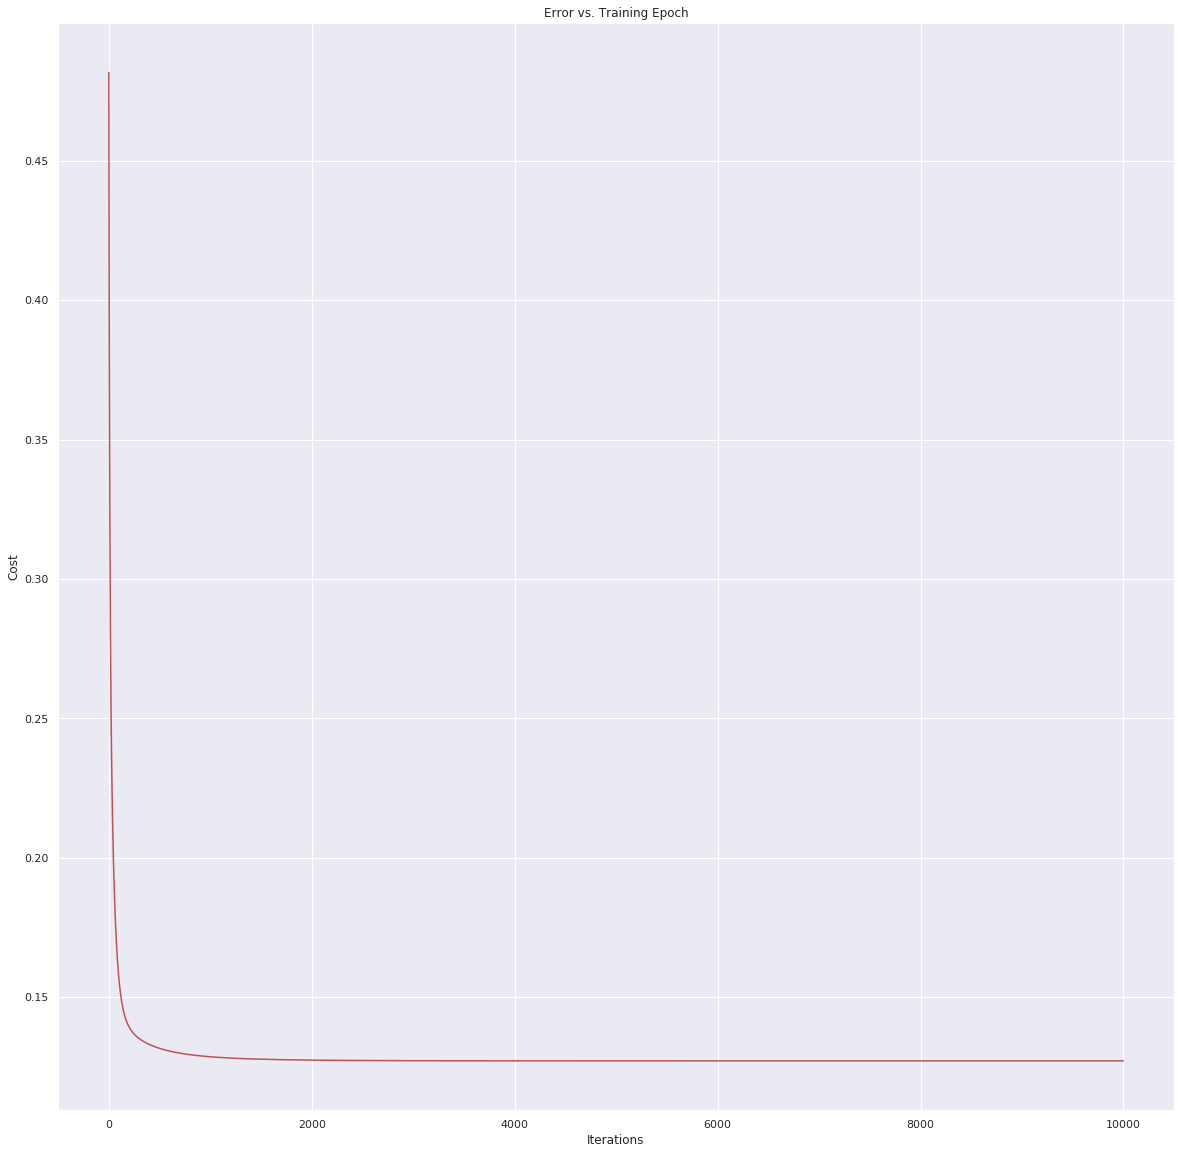

In [ ]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

### as we can see from the above graph that the learning has flattened after 2000 iterations. even if we were to increase the number of iterations further it would make no significant difference. now let us try changing the learning rate.

## Validating the model

In [ ]:
## validating the model
X_hat = testing_data_frame.iloc[:,0:13]
ones_2 = np.ones([X_hat.shape[0],1])
X_hat = np.concatenate((ones_2,X_hat),axis=1)
Y_hat = X_hat @ g.T
Y_hat_list = np.array(Y_hat.T)[0]
y_true = testing_data_frame.iloc[:,13:14]
y_true_list = np.array(y_true.T)[0]

print("mean absolute error is:",sklearn.metrics.mean_absolute_error(Y_hat_list,y_true_list))
print("mean square error is: ",sklearn.metrics.mean_squared_error(Y_hat_list,y_true_list))


mean absolute error is: 0.38090213464953365
mean square error is:  0.28122456948037244


[[-0.00547041 -0.11480155  0.12488569  0.03010499  0.0629996  -0.21897435
   0.30245349 -0.01110833 -0.35378499  0.26788663 -0.22012242 -0.21904826
   0.0982285  -0.40269788]]
0.12711997296651995


Text(0.5, 1.0, 'Error vs. Training Epoch')

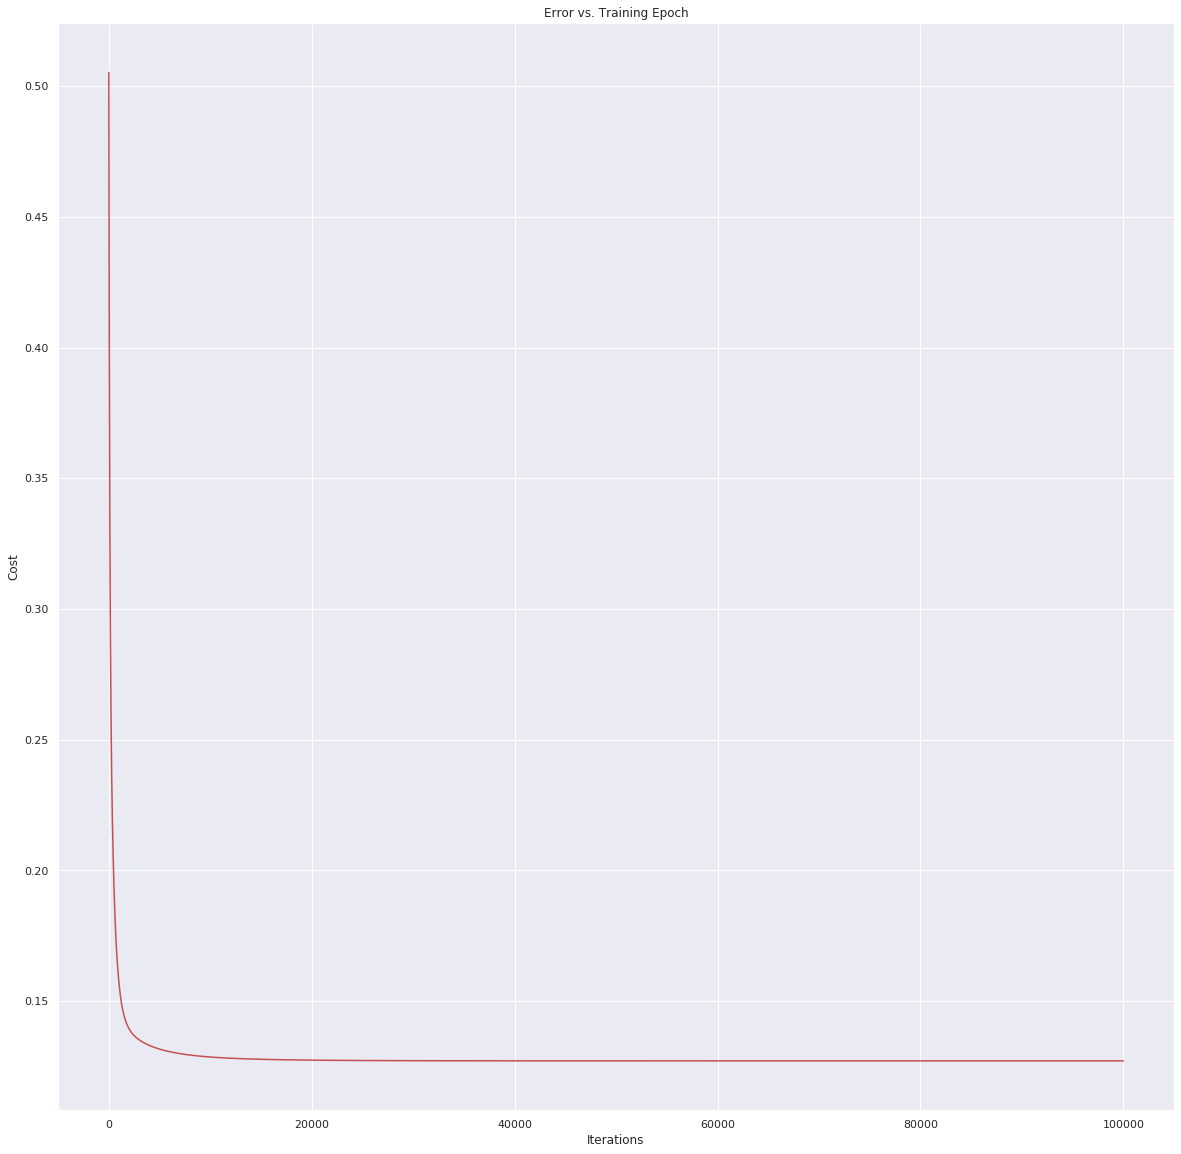

In [ ]:
alpha2 = 0.001
iterations=100000
g,cost = gradientDescent(X,y,theta,iterations,alpha2)
print(g) #coefficient matrix

finalCost = computeCost(X,y,g)
print(finalCost)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')

### we can see that, there is not a lot of variation in final cost even after reducing the learning rate further by a factor of 10 and increasing the iterations by a factor of 10. 

# Dropping a few coloumnns

### let us now try to build a model with only four features namely, RM,ZN,LSTAT,PTRATIO. The reason for choosing these 4 is that, RM and ZN have the highest positive co-relation and LSTAT and PTRATIO have the 2 highest negative co-relation (refer the co-relation matrix in the begining).

In [ ]:
new_data_frame = pd.DataFrame(learning_data_frame.drop(["crim","indus","chas","nox","age","dis","rad","tax","b"],axis=1))
print(new_data_frame)

           zn        rm   ptratio     lstat      medv
207 -0.487240 -0.713951  0.066730  0.757161 -0.003567
13   0.048724 -0.388027 -1.503749 -0.031237  0.039925
22  -0.487240 -0.203004  1.175303  0.849585 -0.797295
369 -0.487240  0.566974  0.805778 -1.249543  2.986505
444 -0.487240 -0.612900  0.805778  1.559563 -1.275707
..        ...       ...       ...       ...       ...
29  -0.487240  0.554165  1.175303 -0.094253 -0.166662
337 -0.487240 -0.554547  0.805778 -0.293103 -0.438487
483 -0.487240 -0.743840  0.805778 -0.312707 -0.079678
234 -0.487240  0.628174 -0.487557 -0.644591  0.703177
220 -0.487240  0.948405 -0.487557 -0.412132  0.453098

[405 rows x 5 columns]


[[-0.00214137 -0.01336747  0.34760096 -0.23330118 -0.44904771]]
0.15877224294885953


Text(0.5, 1.0, 'Error vs. Training Epoch')

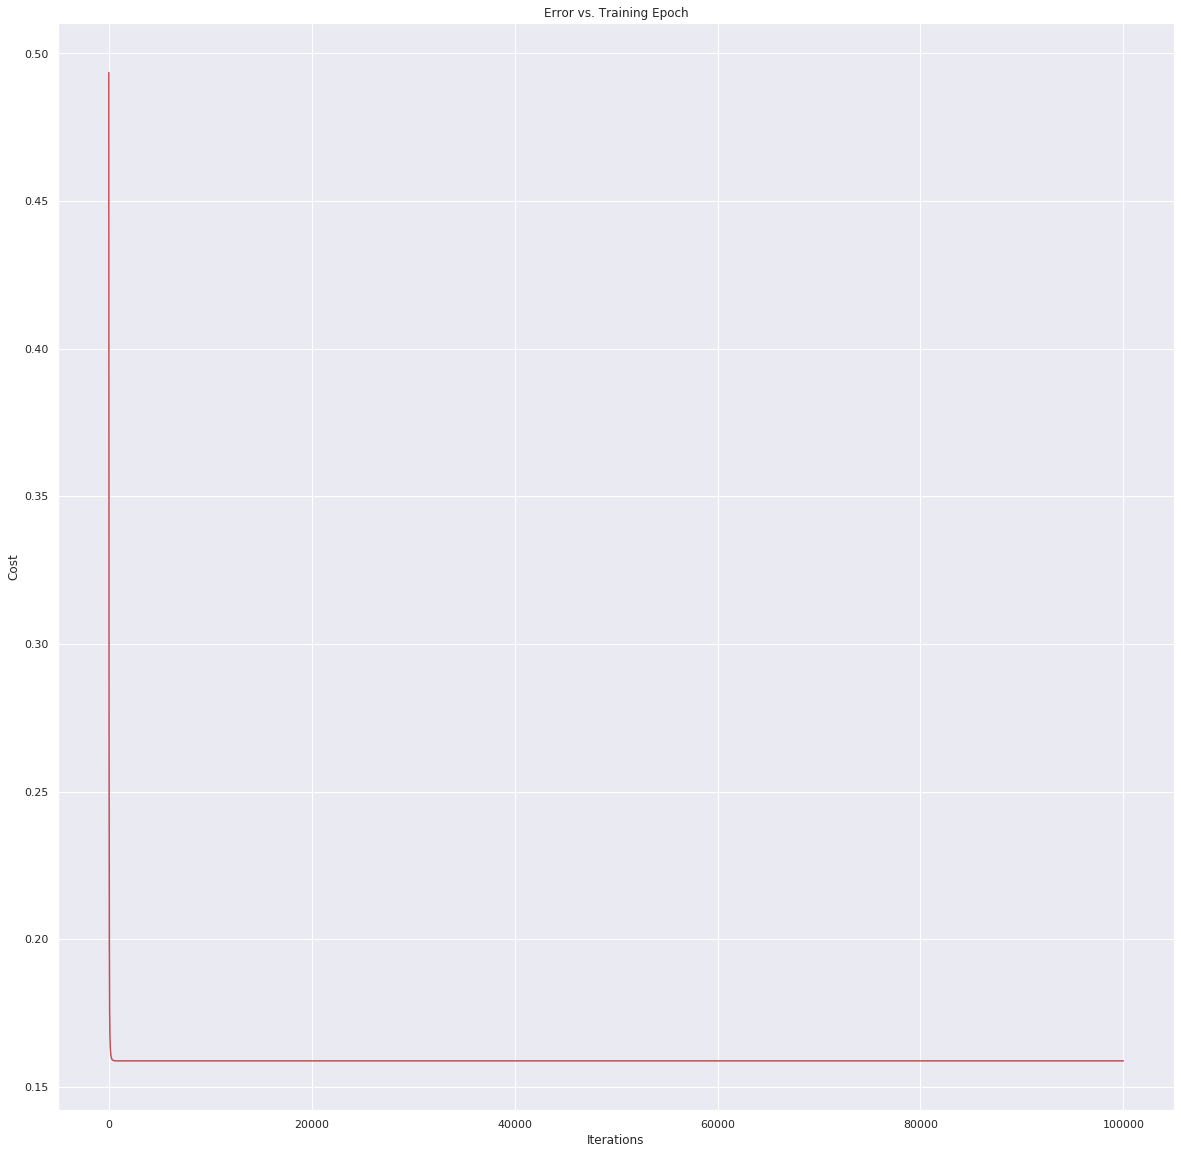

In [ ]:
#creating matrices

X=new_data_frame.iloc[:,0:4]
ones = np.ones([X.shape[0],1])
X= np.concatenate((ones,X),axis=1)
theta = np.zeros([1,5])

y = new_data_frame.iloc[:,4:5].values

g,cost = gradientDescent(X,y,theta,iterations,alpha1)
print(g) #coeeficient matrix

finalCost = computeCost(X,y,g)
print(finalCost)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')



### we observe from the cost function that dropping a few features has increased(0.16) compared to our earlier cost function of 0.12. Which is expected as a larger number of features should generally result in a better understanding and hence better results.

## Validating the model

In [ ]:
testing_data_frame_2 = pd.DataFrame(testing_data_frame.drop(["crim","indus","chas","nox","age","dis","rad","tax","b"],axis=1))
X_hat = testing_data_frame_2.iloc[:,0:4]
ones_3 = np.ones([X_hat.shape[0],1])
X_hat = np.concatenate((ones_3,X_hat),axis=1)
Y_hat = X_hat @ g.T
Y_hat_list = np.array(Y_hat.T)[0]
y_true = testing_data_frame_2.iloc[:,4:5]
y_true_list = np.array(y_true.T)[0]
print("mean absolute error is:",sklearn.metrics.mean_absolute_error(Y_hat_list,y_true_list))
print("mean square error is: ",sklearn.metrics.mean_squared_error(Y_hat_list,y_true_list))

mean absolute error is: 0.40401927158024087
mean square error is:  0.3328129196891888
